In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Check parameter setting

## Network

In [104]:
def get_len(arr):
    return arr[1] - arr[0]


def read_net(fname):
    with open(fname, "r") as fp:
        ntk = dict()
        l = fp.readline()
        # read info
        info = l.split(",")
        ntk["pre_range"] = (int(info[1]), int(info[2]))
        ntk["post_range"] = (int(info[4]), int(info[5]))
        ntk["adj_list"] = []

        l = fp.readline()
        while l:
            tmp = l.split(":")
            ntk["adj_list"].append([int(i) for i in tmp[1].split(",")[:-1]])
            l = fp.readline()
        return ntk

    
def get_degs(ntk):
    pre_range = ntk["pre_range"]
    out_degs = []
    in_degs = np.zeros(ntk["post_range"][1])
    for n in range(*pre_range):
        adj = ntk["adj_list"][n]
        out_degs.append(len(adj))
        in_degs[adj] += 1
    print("d_out = %5.3f, d_in = %5.3f"%(np.average(out_degs), np.average(in_degs)))
    return out_degs, in_degs

In [112]:
ntk_e = read_net("./check_params/net_syn_e.txt")
ntk_i = read_net("./check_params/net_syn_i.txt")

In [113]:
out_degs_e, in_degs_e = get_degs(ntk_e)
out_degs_i, in_degs_i = get_degs(ntk_i)

plt.figure(dpi=120, figsize=(4, 3))
plt.hist(out_degs_i, edgecolor='k')
plt.show()

IndexError: index -1717986918 is out of bounds for axis 0 with size 100

# Read Data (test)

In [172]:
def read_data(fdat, N):
    with open(fdat, "rb") as fp:
        return np.fromfile(fp, np.double).reshape([-1, N])

In [183]:
v_out = read_data("./v_out_synfire.dat", 500)
t = np.arange(v_out.shape[0]) * 0.01

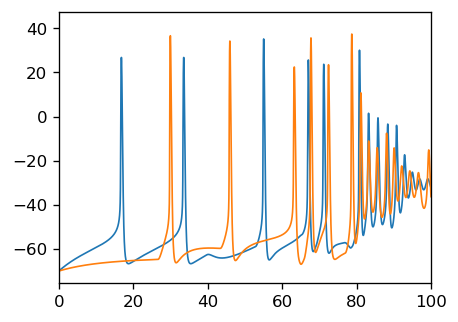

In [188]:
plt.figure(dpi=120, figsize=(4,3))
plt.plot(t, v_out[:,:2], lw=1)
# plt.plot(t, v_out[:, 1], lw=1)
plt.xlim([0, 100])
# plt.xlim([500, 510])
plt.show()